### MultiVariate Linear Regression with L2 Regularization with K-fold crossValidation

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import LeaveOneOut

In [80]:
df=pd.read_csv("AdmissionDataset/data.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


**Drop the Serial No because it is irrelevant in prediction**

In [81]:
df.drop('Serial No.',axis=1,inplace=True)

In [82]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,317,103,2,2.5,2.0,8.15,0,0.65
1,319,108,3,3.0,3.5,8.54,1,0.71
2,322,110,3,3.5,2.5,8.67,1,0.80
3,326,113,5,4.5,4.0,9.40,1,0.91
4,319,106,3,3.5,2.5,8.33,1,0.74


In [90]:
data=np.matrix(df)
print(data.shape)

(450, 8)


### Feature Normalisation
${x_i}$= $\frac{x_i - \mu}{\sigma}$ 

Feature Normalisation is done because data in some columns is very small in comparison to other columns data.

#### Preparing the Training data

In [91]:
def get_data(training_data,testing_data):
    training_data=pd.DataFrame(training_data)
    testing_data=pd.DataFrame(testing_data)
    
    columns=training_data.shape[1]

    X=training_data.iloc[:,0:columns-1]# features Sets

    mu = X.mean()
    sigma = X.std()

    X=(X-X.mean())/X.std()

    Y=training_data.iloc[:,columns-1:columns] # outputSet
    X.insert(0, 'Ones', 1)

    
    X_train = np.matrix(X.values)
    Y_train = np.matrix(Y.values)

    
    columns=testing_data.shape[1]

    X=testing_data.iloc[:,0:columns-1]# features Sets

    Y=testing_data.iloc[:,columns-1:columns] # outputSet

    
    X=(X-mu)/sigma


    X.insert(0, 'Ones', 1)

    X_test = np.matrix(X.values)
    Y_test = np.matrix(Y.values)

    return X_train,Y_train,X_test,Y_test

#### Mean Square Error with  L1 Regularization
${J(\theta)}$=${\frac{1}{2m}}{\sum_{i=0}^{m}}$(${\hat{y_i}-{y_i})^2 +  \frac{\lambda}{m}*\parallel \theta \parallel}$ 


J: is cost function


m : no. of training examples

${\theta}$: parameters

In [92]:
def costCompute_L2(X,Y,theta,lambd):
    j=0.0
    m=X.shape[0]
    
    err = np.power((np.dot(X,theta.T)-Y),2)
    j=np.sum(err)
    reg= (lambd/m)*np.sum(theta)
    
    return j/(2*m)+reg

#### Gradient Descent algo
repeat Untill Converges{


${{\theta_j} :=}{{\theta_j}}$-${\alpha}$*${\frac{\partial}{\partial {\theta_j}} J(\theta)}$


}

${\alpha}$: Learning rate constant

In [93]:
#Vectorised Implementation
def gradientDescent(X, y, theta, alpha, iters,lambd):
    
    Jhistory=np.zeros(iters)
    temp=0.0
    
    m=X.shape[0]
    for i in range(iters):
        
        pre = np.dot(X,theta.T)-y
        
        temp=theta[0,0]-(alpha/m)*np.sum(pre)
        
        delta=np.dot(np.transpose(pre),X)
        theta=theta*(1-(alpha*lambd)/m)-(alpha/m)*delta
        
        
        theta[0,0]=temp
        Jhistory[i] = costCompute_L2(X, y, theta,lambd)
        
        
        

    return theta,Jhistory

In [94]:
def prediction_Error(X,Y,finalParameter):
    out= np.dot(X,finalParameter.T)
    
   
    err= np.sum(np.square(out-Y))/X.shape[0]
    
    return err

In [96]:
alpha=.009
iters=1000
lambd=.01
kf = KFold(n_splits=3)

err_Kfold=[]

for train_index, test_index in kf.split(data):
    training_data,testing_data= data[train_index], data[test_index]
    X_train,Y_train,X_test,Y_test=get_data(training_data,testing_data)

    theta = np.matrix(np.random.randn(1,X_train.shape[1]))*0.01
    #print(theta.shape)

    minTheta, cost= gradientDescent(X_train, Y_train, theta, alpha, iters,lambd)
    error=prediction_Error(X_train,Y_train,minTheta)
    err_Kfold.append(error)
    
print(err_Kfold)
avgErr=0.0    
for i in err_Kfold:
    avgErr+=i
    
print(avgErr/len(err_Kfold))

[0.0035681877920407104, 0.00387828671314742, 0.0034512038405239147]
0.0036325594485706815


In [124]:
choice_kfold=[2,3,4,5,6,7,8,9,10]

err_train=[]
err_test=[]
alpha=.009
iters=1000
for l in choice_kfold:
    err_Kfold_train=[]
    err_Kfold_test=[]
    kf = KFold(n_splits=l)
    
    for train_index, test_index in kf.split(data):
        
        training_data,testing_data= data[train_index], data[test_index]
        X_train,Y_train,X_test,Y_test=get_data(training_data,testing_data)
        #print(X_train.shape)
        
        theta = np.matrix(np.random.randn(1,X_train.shape[1]))
        #print(theta.shape)

        minTheta, cost= gradientDescent(X_train, Y_train, theta, alpha, iters,lambd)
        error1=prediction_Error(X_train,Y_train,minTheta)
        error2=prediction_Error(X_test,Y_test,minTheta)
        
        err_Kfold_train.append(error1)
        err_Kfold_test.append(error2)
    
    avgErr_train=0.0    
    for i in err_Kfold_train:
        avgErr_train+=i
        
    avgErr_train=avgErr_train/len(err_Kfold)
    err_train.append(avgErr_train)
    
    avgErr_test=0.0    
    for i in err_Kfold_test:
        avgErr_test+=i
    
    avgErr_test=avgErr_test/len(err_Kfold)
    err_test.append(avgErr_test)   
    

Text(0.5, 1.0, 'Training Error vs Reg. Parameter')

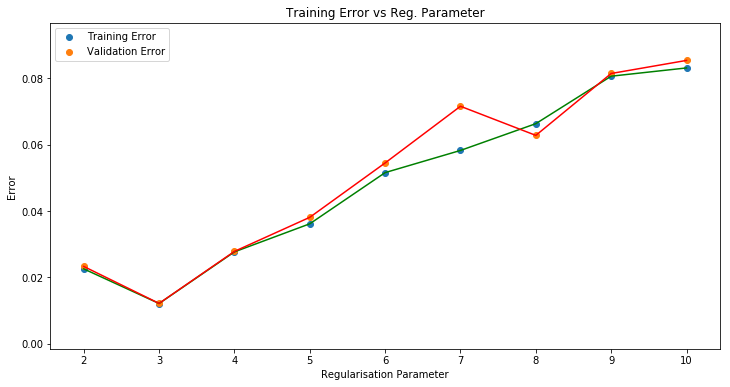

In [125]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.scatter(choice_kfold,err_train,label="Training Error")
plt.plot(choice_kfold,err_train,'g')
plt.scatter(choice_kfold,err_test,label="Validation Error")
plt.plot(choice_kfold,err_test,'r')

plt.legend()

plt.xlabel('Regularisation Parameter')
plt.ylabel('Error')
plt.title('Training Error vs Reg. Parameter')

In [126]:
print(err_train)
print(err_test)

[0.022527749639120367, 0.012074567593579019, 0.027659082082511485, 0.03613436228093208, 0.05158391764063606, 0.05827794178166549, 0.06635932941502834, 0.08068944295171353, 0.08317994158973986]
[0.023264367265675726, 0.012103750188582287, 0.027804807250618447, 0.03808937202550421, 0.054505157038941765, 0.07161129753422409, 0.06282235352920905, 0.0815021899383842, 0.08545046394170115]


### Leave One Out Cross Validation (LOOCV)

**It is special case of K-Fold cross Validation**
> **K =m**<br>
> m: no of training examples

In [129]:
loo = LeaveOneOut()

alpha=.009
iters=1000


err_loo_train=[]
err_loo_test=[]

for train_index, test_index in loo.split(data):
    training_data,testing_data= data[train_index], data[test_index]
    X_train,Y_train,X_test,Y_test=get_data(training_data,testing_data)
    
    #print(X_train.shape)
    
    theta = np.matrix(np.random.randn(1,X_train.shape[1]))
    #print(theta.shape)
    
    minTheta, cost= gradientDescent(X_train, Y_train, theta, alpha, iters,lambd)
    error1=prediction_Error(X_train,Y_train,minTheta)
    error2=prediction_Error(X_test,Y_test,minTheta)

    err_loo_train.append(error1)
    err_loo_test.append(error2)
    
avgErr_train=0.0    
for i in err_loo_train:
    avgErr_train+=i

avgErr_train=avgErr_train/len(err_Kfold)
print(avgErr_train)

avgErr_test=0.0    
for i in err_Kfold_test:
    avgErr_test+=i

avgErr_test=avgErr_test/len(err_Kfold)
print(avgErr_test) 
   

3.5094634222377166
0.08545046394170115


- It is highly computationaly expensive
- There is no randomness in splitting procedure, therefore it always yeilds the same result, so it is stable